# Applied ML

In [1]:
# Normal stack of pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Statistical test library
import scipy.stats as stats
import random

from sklearn import preprocessing
import sklearn
print(sklearn.__file__)
print(sklearn.__version__)
print(sklearn.__path__)
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib inline

np.random.seed(10)
random.seed(10)

/home/raccct/anaconda3/lib/python3.5/site-packages/sklearn/__init__.py
0.18.1
['/home/raccct/anaconda3/lib/python3.5/site-packages/sklearn']


/home/raccct/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/raccct/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Data pre-processing

In [2]:
# Load the dataset
original = pd.read_csv("CrowdstormingDataJuly1st.csv", parse_dates=['birthday'], infer_datetime_format=True)

In [3]:
original.describe()

/home/raccct/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,641.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1604.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,2345.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


In [4]:
# First glimpse at data content
original.ix[:5,:13]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,1983-08-31,177.0,72.0,Attacking Midfielder,1,0,0,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,1982-01-08,179.0,82.0,Right Winger,1,0,0,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,1992-12-17,181.0,79.0,NaN,1,0,1,0,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,1993-08-31,191.0,87.0,Center Back,1,1,0,0,0
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,1991-07-18,172.0,70.0,Right Midfielder,1,1,0,0,0
5,aaron-hughes,Aaron Hughes,Fulham FC,England,1979-11-08,182.0,71.0,Center Back,1,0,0,1,0


In [5]:
original.ix[:5,13:]

,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,1,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
5,0,0,0,3868.jpg,0.25,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


Challenges in dataset:

- Skin ratings don't match -> take average
- Picture was missing -> exclude from training
- No cards drawn in some dyads


Prune dataset where there is no rater information

In [6]:
# Helper function to see the efect when we drop rows
def dropping_stats(df):
    drop_perc =  100 * (original.shape[0] - df.shape[0]) / original.shape[0]
    print("%.2f%% of original data droped." % (drop_perc) )
    
    print("Now: %d rows" % df.shape[0] )

# Initial cleaning


In [7]:
# Drop columns that will not be relevant for our model
original['year'] = original['birthday'].apply(lambda x: x.year)

#nan-dropping
data = original.dropna(how='any', subset=['rater1', 'rater2', 'meanExp', 'meanIAT'])
data.drop(['photoID', 'refCountry', 'Alpha_3', 'player', 'birthday'], errors='raise', axis=1, inplace=True)

/home/raccct/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
# If a referee is present in less than 22 triads (rows), he cannot have
# refereed a match in these leages.
ref_grouped = data[['refNum', 'games']].groupby(['refNum']).sum()
ref_filtered = ref_grouped[ref_grouped['games'] >= 22].reset_index()

# Therefore, we filter the data on this condition
has_referee = data[data['refNum'].isin(ref_filtered['refNum'].values)]
cleaned = has_referee
dropping_stats(cleaned)


20.21% of original data droped.
Now: 116522 rows


In [9]:
cleaned = cleaned[cleaned['meanIAT'].notnull()]

### Dealing with nan-values


In [10]:
cleaned['weight'].isnull().value_counts()

False    115874
True        648
Name: weight, dtype: int64

In [11]:
cleaned['height'].isnull().value_counts()

False    116499
True         23
Name: height, dtype: int64

In [12]:
cleaned['leagueCountry'].isnull().value_counts()

False    116522
Name: leagueCountry, dtype: int64

We will fill these with the mean value

In [13]:
cleaned['weight'].fillna(cleaned['weight'].mean(), inplace=True)
cleaned['height'].fillna(cleaned['height'].mean(), inplace=True)

In [14]:
print(cleaned['height'].hasnans)
print(cleaned['weight'].hasnans)

False
False


## Making the class feature

To make the class of the skin color of each player, we take the mean of the value from the two raters. 
Players that does not have a rating gets dropped.

In [15]:
def get_binary_class(x):
    """ Returns 0 for players rated below 0.5 ('light-skinned') and 1 for players rated above ('dark-skinned')"""
    if x <= 0.5:
        return 0
    else:
        return 1

In [16]:
# Take the mean of the two raters value
mean_rating = has_referee[['rater1', 'rater2']].mean(axis=1)

# Drop the players that does not have a rating
mean_rating.dropna(inplace=True)

dropping_stats(mean_rating)

20.21% of original data droped.
Now: 116522 rows


In [17]:
# The players now have a rating between 0 and 1, real numbers
mean_rating.head()

5    0.125
6    0.125
7    1.000
8    0.250
9    0.000
dtype: float64

In [18]:
# Since we want to do a binary classification, we convert the real numbers to 0/1

binary_class = mean_rating.apply(get_binary_class)
binary_class.name = 'class'
binary_class.head()

5    0
6    0
7    1
8    0
9    0
Name: class, dtype: int64

In [19]:
# Keep only the data rows where we have the class

has_class = has_referee.ix[binary_class.index]
dropping_stats(has_class)

20.21% of original data droped.
Now: 116522 rows


In [20]:
counts = binary_class.value_counts()
counts

0    98033
1    18489
Name: class, dtype: int64

In [21]:
print("%.2f%% of the examples are light skinned" % (counts[0] / (counts[0] + counts[1]) * 100))

84.13% of the examples are light skinned


Convert string values to floats by LabelEncoder to make them readable by the classifier

## Feature transformation

When we have categorical data, we need to transform them so that they can be taken into account in our model. One way of doing this is to use LabelEncoder and OneHotEncoder from SciKitLearn. 

LabelEncoder converts each category into an integer, so that we don't have to deal with strings. After doing this transformation, we use OneHotEncoder to make a binary feature for each category. This way, we can capture for instance wether a person has played for both Fulham FC and Manchester City. 

In [22]:
countries_encoded = pd.get_dummies(has_class['leagueCountry'])
countries_encoded.head()

,England,France,Germany,Spain
5,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0


In [23]:
position_encoded = pd.get_dummies(has_class['position'])
position_encoded.head()

,Attacking Midfielder,Center Back,Center Forward,Center Midfielder,Defensive Midfielder,Goalkeeper,Left Fullback,Left Midfielder,Left Winger,Right Fullback,Right Midfielder,Right Winger
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


We remove the original categorical features, and attatch the new one_hot_encoded ones :

### Feature combinations

In [24]:
# Our hypothesis is that the combination of the referees 'discrimination score' and cards given,
# might help us classify the players. E.g., if a player got many cards from racist referees, 
# he is more likely dark-skinned.

red_exp = has_class['redCards'] * has_class['meanExp'] 
yellow_exp = has_class['yellowCards'] * has_class['meanExp']
yellow_red_exp = has_class['yellowReds'] * has_class['meanExp']

red_iat = has_class['redCards'] * has_class['meanIAT'] 
yellow_iat = has_class['yellowCards'] * has_class['meanIAT']
yellow_red_iat = has_class['yellowReds'] * has_class['meanIAT']

cards_iat = pd.concat([red_exp, yellow_exp, yellow_red_exp, red_iat, yellow_iat, yellow_red_iat], axis=1)
cards_iat.columns = ['red_exp', 'yellow_exp', 'red_yellow_exp', 'red_iat', 'yellow_iat', 'red_yellow_iat']
cards_iat.head(10)

,red_exp,yellow_exp,red_yellow_exp,red_iat,yellow_iat,red_yellow_iat
5,0.0,0.000000,0.0,0.0,0.000000,0.0
6,0.0,0.000000,0.0,0.0,0.000000,0.0
7,0.0,0.000000,0.0,0.0,0.000000,0.0
8,0.0,0.000000,0.0,0.0,0.000000,0.0
9,0.0,0.000000,0.0,0.0,0.000000,0.0
10,0.0,0.538462,0.0,0.0,0.325185,0.0
11,0.0,0.000000,0.0,0.0,0.000000,0.0
12,0.0,0.000000,0.0,0.0,0.000000,0.0
13,0.0,0.000000,0.0,0.0,0.000000,0.0
14,0.0,0.000000,0.0,0.0,0.000000,0.0


### Combining the features

In [25]:
columns_from_orig = ['playerShort', 'year', 'height', 'weight', 'games', 'victories','ties', 'defeats','goals','yellowCards',
                     'yellowReds','redCards','meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp']

colomns_one_hot_enoded = countries_encoded.columns | position_encoded.columns

features = has_class[columns_from_orig].join(countries_encoded).join(position_encoded).join(cards_iat).join(binary_class)
features.head()

,playerShort,year,height,weight,games,victories,ties,defeats,goals,yellowCards,...,Right Fullback,Right Midfielder,Right Winger,red_exp,yellow_exp,red_yellow_exp,red_iat,yellow_iat,red_yellow_iat,class
5,aaron-hughes,1979,182.0,71.0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,aleksandar-kolarov,1985,187.0,80.0,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,alexander-tettey,1986,180.0,68.0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,anders-lindegaard,1984,193.0,80.0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,andreas-beck,1987,180.0,70.0,1,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [26]:
features.shape

(116522, 41)

### Aggregating over the players:

We now run grouping and aggregation of our dataframe. The aggregation functions used are defined in two dictionarys.
Each element of the dictionarys contains of a column name and an aggregation function, which is applied to our grouped features.

In [27]:
players = features.groupby(['playerShort','year','height', 'weight'])

# We sum over the one hot encoded features
one_hot_aggregation = {i: max for i in colomns_one_hot_enoded}

# And then sum over games, victories, ties, defeats, goals, cards, 
column_aggfunc_mapping = {'class': max, 'games': sum, 'victories': sum, 'ties': sum, 'defeats': sum, 'goals': sum,
                          'yellowCards': sum, 'yellowReds': sum, 'redCards': sum, 'red_exp': sum,
                          'yellow_exp': sum, 'red_yellow_exp': sum, 'red_iat': sum,
                          'yellow_iat': sum, 'red_yellow_iat': sum, 'meanIAT': np.mean, 'meanExp': np.mean}

# Union the aggregation function dicts
agg_funcs = {**one_hot_aggregation, **column_aggfunc_mapping}

agg_features = players.agg(agg_funcs)
agg_features = agg_features.reset_index().set_index('playerShort')
agg_features.head()

,year,height,weight,meanIAT,defeats,victories,Attacking Midfielder,Center Forward,Left Midfielder,red_yellow_exp,...,goals,ties,meanExp,Right Winger,Defensive Midfielder,yellowCards,England,yellow_exp,Goalkeeper,red_iat
playerShort,,,,,,,,,,,,,,,,,,,,,
aaron-hughes,1979,182.0,71.0,0.345236,224,243,0.0,0.0,0.0,0.000000,...,8,179,0.489953,0.0,0.0,19,1.0,8.230927,0.0,0.000000
aaron-hunt,1986,183.0,73.0,0.348943,122,141,1.0,0.0,0.0,0.000000,...,62,72,0.450376,0.0,0.0,42,0.0,16.268793,0.0,0.336628
aaron-lennon,1987,165.0,63.0,0.345893,115,200,0.0,0.0,0.0,0.000000,...,31,97,0.491482,0.0,0.0,11,1.0,4.423886,0.0,0.000000
aaron-ramsey,1990,178.0,76.0,0.347013,67,144,0.0,0.0,0.0,0.000000,...,39,42,0.511374,0.0,0.0,31,1.0,13.311479,0.0,0.334684
abdelhamid-el-kaoutari,1990,180.0,73.0,0.331600,43,41,0.0,0.0,0.0,1.453982,...,1,40,0.335587,0.0,0.0,8,0.0,2.688808,0.0,0.669368


## Normalizing

In [47]:
X = preprocessing.normalize(agg_features, norm='l2')
X

array([[  9.31490175e-01,   8.56650894e-02,   3.34187986e-02, ...,
          3.87419277e-03,   0.00000000e+00,   0.00000000e+00],
       [  9.75915974e-01,   8.99257921e-02,   3.58720373e-02, ...,
          7.99444850e-03,   0.00000000e+00,   1.65418329e-04],
       [  9.68075976e-01,   8.03887952e-02,   3.06939036e-02, ...,
          2.15533869e-03,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  9.69763896e-01,   8.91849565e-02,   3.72420698e-02, ...,
          8.14366216e-03,   0.00000000e+00,   1.03395352e-03],
       [  9.94426209e-01,   9.27262342e-02,   4.21027225e-02, ...,
          5.89736154e-04,   5.01222887e-04,   3.70798271e-04],
       [  9.90491233e-01,   9.27650400e-02,   3.89014684e-02, ...,
          6.37106884e-03,   0.00000000e+00,   0.00000000e+00]])

## Machine Learning by RandomForestClassifier

In [48]:
X = agg_features.drop('class', axis=1)
y = agg_features['class']

### Base model

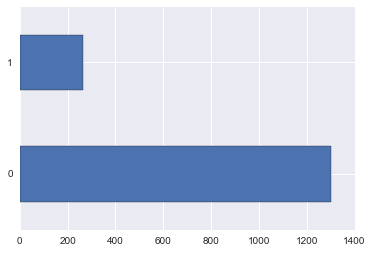

In [49]:
y.value_counts().plot(kind='barh', stacked=True)

In [50]:
print('There are about %.2f%% 0s in the class vector.' % (y.value_counts()[0] / y.shape[0]))

There are about 0.83% 0s in the class vector.


The result above shows that by allways predicting 0, we could achieve an accuracy of approximately 60%. 
We should therefore expect that our classifier performs at least as good as this, and hopefully significantly better. 

### Tuning the model

In [51]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=10, random_state=42) 

param_grid = {
    'max_features': ['log2','sqrt', None],
    'min_samples_leaf': [2,20,200],
    'max_depth': [4,8,16,None],
}

#(8)    'max_depth': [4,8,16,None],
#(gini) 'criterion': ['gini', 'entropy'],
#(log2) 'max_features': ['log2','sqrt', None],
#(20) 'min_samples_split': [2,20,200],
#(2) 'min_samples_leaf': [2,20,200],
#(20) 'min_samples_split': [2,20,200],
#(1e-7) 'min_impurity_split': [1e-07, 1e-06, 1e-05],
#(True) 'bootstrap': [True, False],

#### Optimizing for F1 score

In [52]:
CV_rfc = GridSearchCV(estimator=rfc, scoring='f1', param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
CV_rfc.fit(X, y)
print(CV_rfc.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/home/raccct/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/raccct/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/raccct/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/raccct/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/raccct/anaconda3/lib/python3.5/site-packages/sklearn/m

{'max_features': None, 'max_depth': 16, 'min_samples_leaf': 2}


#### Optimizing for accuracy

In [53]:
CV_rfc = GridSearchCV(estimator=rfc, scoring='accuracy', param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
CV_rfc.fit(X, y, )
print(CV_rfc.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   22.1s finished


{'max_features': 'log2', 'max_depth': None, 'min_samples_leaf': 2}


### Training the model

We use the results found in the grid search to tune our random forrest classifier. 

Description of the hyperparameters:

- n_estimators: The number of trees used in random forest
- min_samples_leaf: TODO
- max_features: TODO
- max_depth: The maximal depth of the tree

- bootstrap: Todo
- oob_score: Todo
- n_jobs: Number of processes used in the calculation. -1 uses all avilable.
- random_state: Seed for the random generator, to give reproducable results.

In [54]:
rfc = RandomForestClassifier(n_estimators=500, min_samples_leaf=2, max_features='log2', max_depth=None, random_state=4, n_jobs=-1)
print(rfc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=4,
            verbose=0, warm_start=False)


We can then fit our model to the data:

In [55]:
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=4,
            verbose=0, warm_start=False)

## Inspect most relevant features of RandomForest

Feature ranking:
1. feature 27 : meanExp  (0.097080)
2. feature 3 : meanIAT  (0.094615)
3. feature 5 : victories  (0.059100)
4. feature 25 : goals  (0.055467)
5. feature 13 : games  (0.053646)
6. feature 32 : yellow_exp  (0.052737)
7. feature 4 : defeats  (0.051480)
8. feature 17 : yellow_iat  (0.050711)
9. feature 26 : ties  (0.049650)
10. feature 2 : weight  (0.048561)
11. feature 1 : height  (0.042499)
12. feature 10 : France  (0.041251)
13. feature 30 : yellowCards  (0.041128)
14. feature 0 : year  (0.039873)
15. feature 9 : red_yellow_exp  (0.026803)
16. feature 20 : red_exp  (0.026683)
17. feature 34 : red_iat  (0.026200)
18. feature 16 : red_yellow_iat  (0.023665)
19. feature 12 : Germany  (0.020366)
20. feature 23 : redCards  (0.012500)
21. feature 14 : yellowReds  (0.012022)
22. feature 7 : Center Forward  (0.011473)
23. feature 22 : Spain  (0.011213)
24. feature 31 : England  (0.009633)
25. feature 33 : Goalkeeper  (0.007748)
26. feature 29 : Defensive Midfielder  (0.005855)


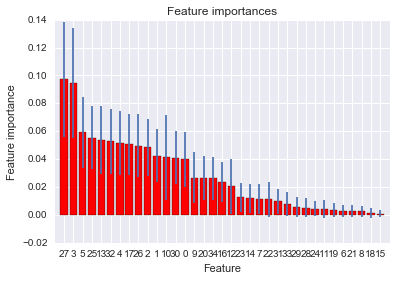

In [56]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d : %s  (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.show()

## Performance assessment 

### Cross-validation

In [57]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
scores = cross_val_score(rfc, X, y, cv=10, scoring='accuracy', n_jobs=-1)
print(scores)
print('Achieved model score: ', np.mean(scores))

[ 0.82802548  0.85350318  0.82802548  0.82692308  0.8525641   0.83974359
  0.83974359  0.84615385  0.8525641   0.83333333]
Achieved model score:  0.840057978115


Visualize score results as boxplots

{'boxes': [<matplotlib.lines.Line2D at 0x7f98c4b264a8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f98c4b99ef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f98c4ab7a58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f98c4ab7080>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f98c4b26ef0>,
  <matplotlib.lines.Line2D at 0x7f98c4b26a20>]}

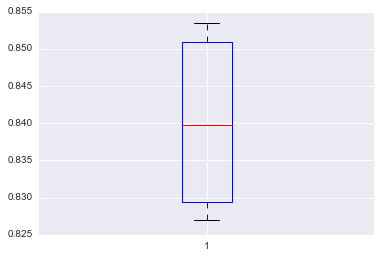

In [58]:
plt.boxplot(scores)

### Confusion matrix

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1250, 35) (313, 35) (1250,) (313,)


In [72]:
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92       266
          1       0.67      0.04      0.08        47

avg / total       0.83      0.85      0.79       313



Visualize confusion matrix

Confusion matrix, without normalization
[[1299    1]
 [ 204   59]]


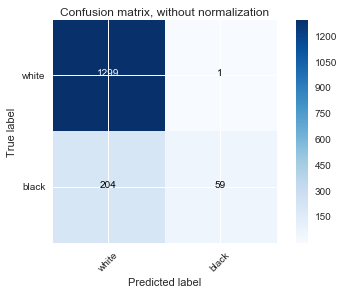

In [76]:
from plot_helpers import custom_confusion_matrix
from sklearn.metrics import confusion_matrix

y_true = y
y_pred = rfc.predict(X)

cm = confusion_matrix(y_true, y_pred)

custom_confusion_matrix(cm, classes=['white','black'], title='Confusion matrix, without normalization')

Normalized confusion matrix
[[  9.99230769e-01   7.69230769e-04]
 [  7.75665399e-01   2.24334601e-01]]


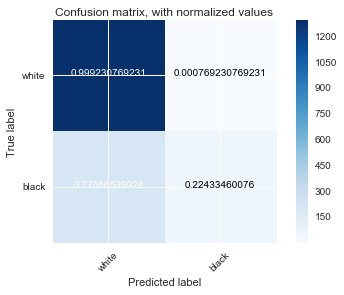

In [77]:
custom_confusion_matrix(cm, classes=['white','black'], normalize=True, title='Confusion matrix, with normalized values')

## Statistical significance of result

Here we test the distribution of the achieved learning score against the learning score value achieved by a simple DummyClassifier to see if our model actually performs significantly better.

In [91]:
from scipy.stats import ttest_1samp
dummy_ratio = 0.83
t,p_value = ttest_1samp(scores, dummy_ratio, axis=0)
p_value

0.015925950146737929

Since the p-value is below 0.05 we don't reject the null hypothesis which is the assumption that the mean of the random sample consisting of the results of our crossvalidation is equal to true mean, consisting of the dummy classifier ratio. This concludes that our models performance is not significantly better than the datasets random level class ratio.

# Bonus: Learning curve


In [61]:
#train_sizes = np.arange(300,1201, int((1201-300)/20))
train_sizes = np.arange(0.1, 1.0, 0.8/3)
train_sizes.shape

(4,)

In [62]:


rfc = RandomForestClassifier(
    n_estimators=1000, min_samples_leaf=2, max_features='log2', max_depth=8,
    bootstrap=True, oob_score=True, random_state=4, n_jobs=-1)

train_sizes, train_scores, test_scores = learning_curve(
     rfc, X, y, train_sizes=train_sizes, cv=10, n_jobs=-1)

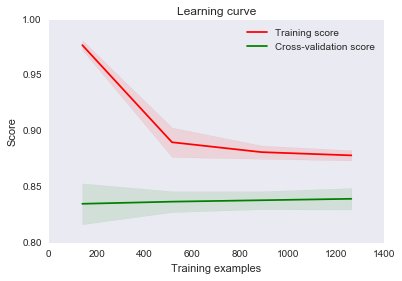

In [63]:
plt.figure()
plt.title("Learning curve")

plt.xlabel("Training examples")
plt.ylabel("Score")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, '-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, '-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

### Club skin-color rate

In [64]:
# TODO: is this cheating?
club_class = pd.concat([has_class['club'], binary_class], axis=1)
club_class_mean = club_class.groupby('club').mean()
club_class_mean.columns = ['club_class_mean']
club_class_mean.head()

,club_class_mean
club,
1. FC Nürnberg,0.000000
1. FSV Mainz 05,0.082734
1899 Hoffenheim,0.000000
AC Ajaccio,0.202212
AS Nancy,0.399194


In [65]:
club_stats = pd.DataFrame(has_class['club']).merge(club_class_mean, left_on='club', right_index=True, how='left')
club_stats.head()

,club,club_class_mean
5,Fulham FC,0.093190
6,Manchester City,0.263057
7,Norwich City,0.418152
8,Manchester United,0.219795
9,1899 Hoffenheim,0.000000


In [66]:
plt.savefig("Learning_curve")

## TODO

- Verify if classifier should be categorical of binary
- Take into account the referee statistics in a smart way (see Slack discussion)
- Try different parameters for the random forest to compare results (bias, variance)
- Bonus
- Exercise 2
